In [ ]:
#Preserving Knowledge and Data in DFAB
#Knowledge Graphs
#A few stepts to a simple database

#This is the python notebook the workshop Preserving Knowledge and Data in DFAB.

#In this colab notebook you will learn how to make use of the RDFlib library in python and how to create and manipulate RDF graphs with python.

#Disclaimer: this document is based on an example used in the course "Knowledge Graphs - Foundations and Applications" by Prof. Dr. Harald Sack
#RDFlib

#RDFlib is is a Python package for working with RDF. It contains:

#    parsers and serializers for RDF/XML, N3, NTriples, N-Quads, Turtle, TriX, Trig and JSON-LD
#    a graph interface which can be backed by any one of a number of store implementations
#    store implementations for in-memory, persistent on disk (Berkeley DB) and remote SPARQL endpoints
#    a SPARQL 1.1 implementation - supporting SPARQL 1.1 Queries and Update statements
#    SPARQL function extension mechanisms

#We have to install the following packages:

#    RDFlib for working with RDF
#    PyDotPlus for visualization



In [3]:
!pip3 install rdflib pydotplus SPARQLWrapper graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.5 MB/s eta 0:00:00


In [4]:
#import rdflib
from rdflib import Graph, Namespace, URIRef, Literal
from rdflib.namespace import DC, RDF, FOAF, RDFS, XSD #import already in RDFlib integrated namespaces
#for visualization
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from graphviz import Source
#for json
import json

In [5]:
# helper function for visualizing RDF graphs
def visualize(g):
     stream = io.StringIO()
     rdf2dot(g, stream, opts = {display})
     dg = pydotplus.graph_from_dot_data(stream.getvalue())
     png = dg.create_png()
     display(Image(png))

In [6]:
# helper function for visualizing RDF graphs in external files
def visualize_to_file(g, filename):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dot_source = stream.getvalue()
    # Füge die Attribute direkt zur DOT-Quelle hinzu
    dot_source = 'digraph G {\nsize="1000,1000!"; dpi="300"; ratio="fill"; rankdir="LR"; splines="true"; overlap="false";\n' + dot_source[10:]
    src = Source(dot_source)
    src.format = 'png'
    src.render(filename, view=False)
    print(f"Graph wurde in {filename}.png gespeichert.")

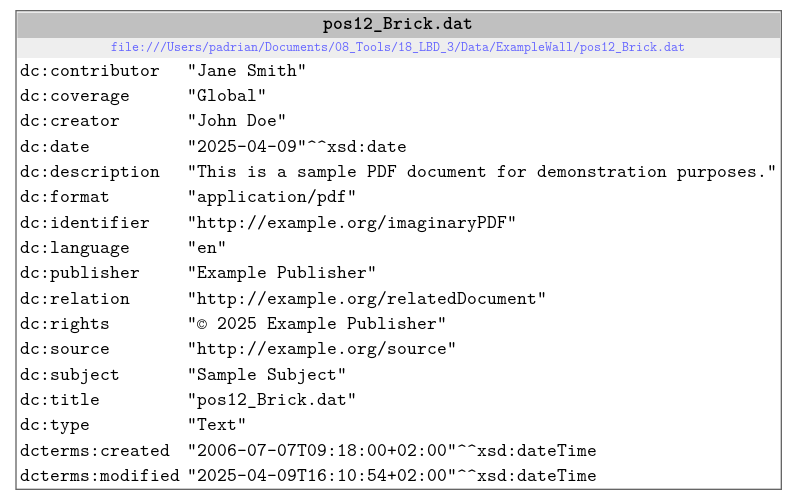

In [27]:
#Semanticly enrichted digital archive material
#modeled after https://docs.swissartresearch.net/et/do/
#and https://bso.swissartresearch.net/sparql
f = Graph()
# create graph using turtle
turtledata = """\
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
PREFIX dc: <http://purl.org/dc/elements/1.1/> 
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX dca: <https://konstruktionsarchiv.ethz.ch/>
PREFIX ex: </Users/padrian/Documents/08_Tools/18_LBD_3/Data/ExampleWall/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 

ex:pos12_Brick.dat
    dc:title "pos12_Brick.dat" ;
    dc:creator "John Doe" ;
    dc:subject "Sample Subject" ;
    dc:description "This is a sample PDF document for demonstration purposes." ;
    dc:publisher "Example Publisher" ;
    dc:contributor "Jane Smith" ;
    dc:date "2025-04-09"^^xsd:date ;
    dc:type "Text" ;
    dc:format "application/pdf" ;
    dc:identifier "http://example.org/imaginaryPDF" ;
    dc:source "http://example.org/source" ;
    dc:language "en" ;
    dc:relation "http://example.org/relatedDocument" ;
    dc:coverage "Global" ;
    dc:rights "© 2025 Example Publisher" ;
    dcterms:created "2006-07-07T09:18+02:00"^^xsd:dateTime ;
    dcterms:modified "2025-04-09T16:10:54+02:00"^^xsd:dateTime . """


f.parse(data=turtledata, format="turtle")
f.serialize(destination="dca2.json", format="json-ld")
visualize(f)


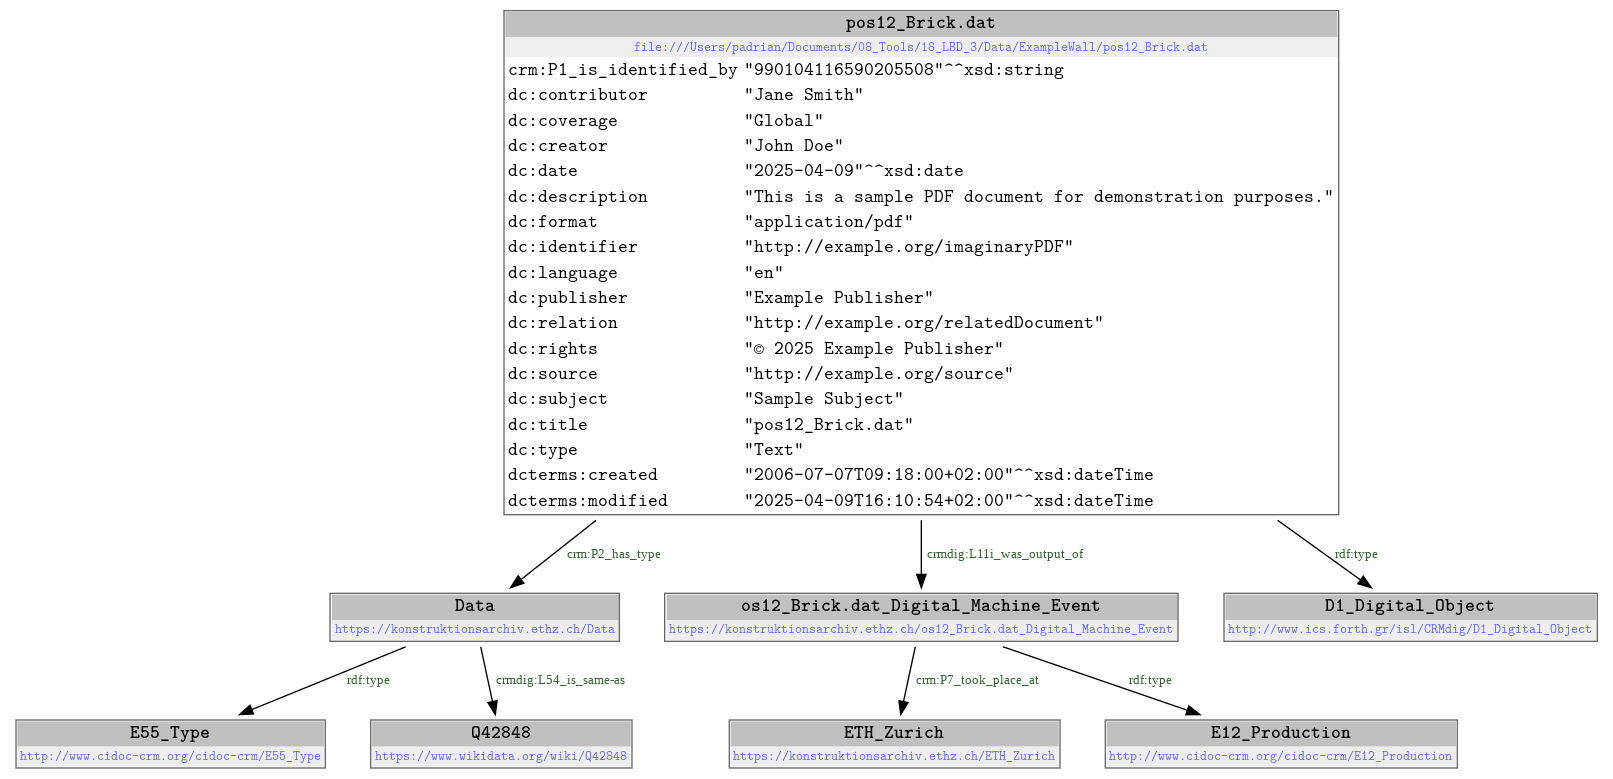

In [26]:
#Semanticly enrichted digital archive material, as part of a collection
#modeled after https://docs.swissartresearch.net/et/do/
#and https://bso.swissartresearch.net/sparql
h = Graph()
# create graph using turtle
turtledata = """\
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX dca: <https://konstruktionsarchiv.ethz.ch/>
PREFIX ex: </Users/padrian/Documents/08_Tools/18_LBD_3/Data/ExampleWall/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> 
PREFIX dc: <http://purl.org/dc/elements/1.1/> 


ex:pos12_Brick.dat
    dc:title "pos12_Brick.dat" ;
    dc:creator "John Doe" ;
    dc:subject "Sample Subject" ;
    dc:description "This is a sample PDF document for demonstration purposes." ;
    dc:publisher "Example Publisher" ;
    dc:contributor "Jane Smith" ;
    dc:date "2025-04-09"^^xsd:date ;
    dc:type "Text" ;
    dc:format "application/pdf" ;
    dc:identifier "http://example.org/imaginaryPDF" ;
    dc:source "http://example.org/source" ;
    dc:language "en" ;
    dc:relation "http://example.org/relatedDocument" ;
    dc:coverage "Global" ;
    dc:rights "© 2025 Example Publisher" ;
    dcterms:created "2006-07-07T09:18+02:00"^^xsd:dateTime ;
    dcterms:modified "2025-04-09T16:10:54+02:00"^^xsd:dateTime;
    rdf:type crmdig:D1_Digital_Object ;
    crm:P1_is_identified_by "990104116590205508"^^xsd:string;
    crm:P2_has_type dca:Data ;
    crmdig:L11i_was_output_of dca:os12_Brick.dat_Digital_Machine_Event .

dca:os12_Brick.dat_Digital_Machine_Event
    rdf:type crm:E12_Production;
    crm:P7_took_place_at dca:ETH_Zurich.


dca:Data
    rdf:type crm:E55_Type ;
    crmdig:L54_is_same-as <https://www.wikidata.org/wiki/Q42848> ."""


h.parse(data=turtledata, format="turtle")
h.serialize(destination="dca3.json", format="json-ld")
visualize(h)
